### import libraries needed

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
cmap = sns.cm.mako_r


### importing the Dataset

In [3]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Drop id column and getting statistics summary of the data 

In [6]:
stroke.drop(columns=['id']).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Variance features Distribution 

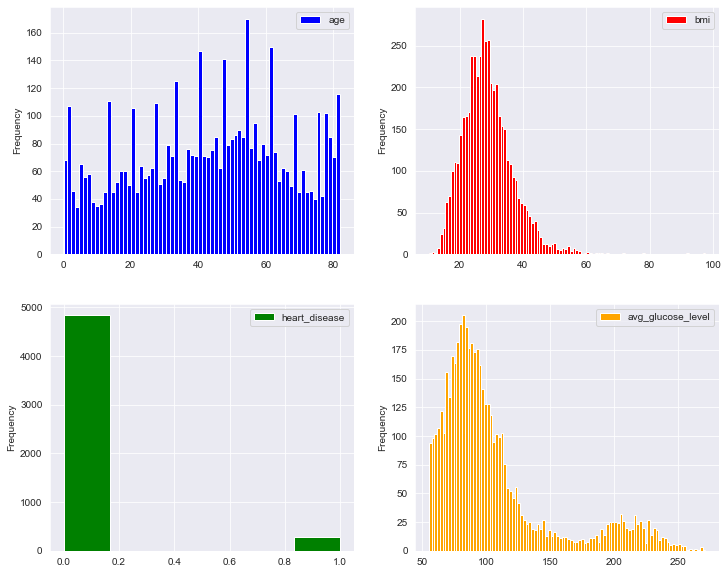

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
stroke.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
stroke.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
stroke.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
stroke.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

## Gender and Stroke Relationship

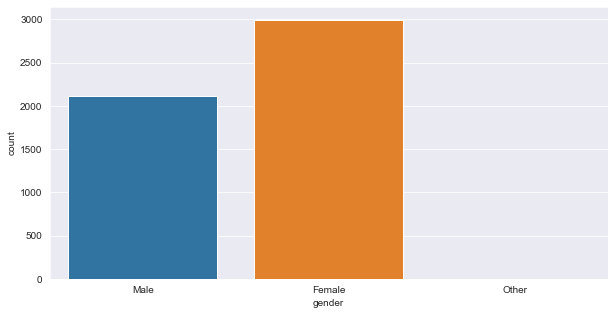

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke, x='gender')
plt.show()

### Preprocessing Data before Exploratory Data Analysis

In [9]:
# Round off Age

stroke['age'] = stroke['age'].apply(lambda x : round(x))

# BMI to NAN

stroke['bmi'] = stroke['bmi'].apply(lambda bmi_value : bmi_value if 12 < bmi_value < 60 else np.nan)

# Sorting DataFrame based on Gender then on Age and using Forward Fill-ffill() to fill NaN value for BMI

stroke.sort_values(['gender', 'age'], inplace=True)
stroke.reset_index(drop=True, inplace=True)
stroke['bmi'].ffill(inplace=True)

In [10]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


### Exploratory Data Analysis

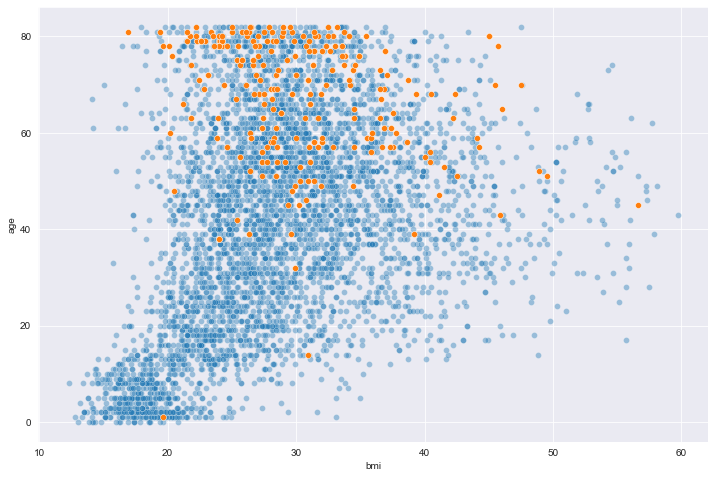

In [11]:
# Age vs BMI with hue = stroke

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='bmi', y='age', alpha= 0.4, data=stroke[stroke['stroke']== 0])
sns.scatterplot(x='bmi', y='age', alpha=1, data=stroke[stroke['stroke']== 1], ax = ax)

plt.show()

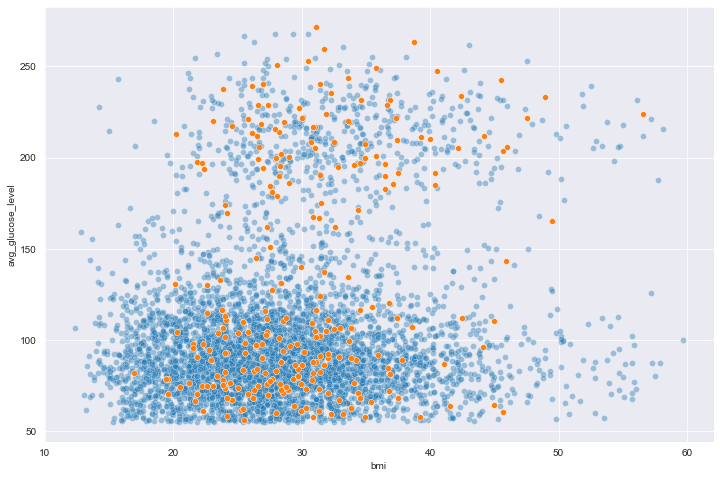

In [12]:
# avgerage glucose level vs BMI with hue = stroke

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=0.4, data=stroke[stroke['stroke'] == 0])
sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=1, data=stroke[stroke['stroke'] == 1], ax=ax)
plt.show()

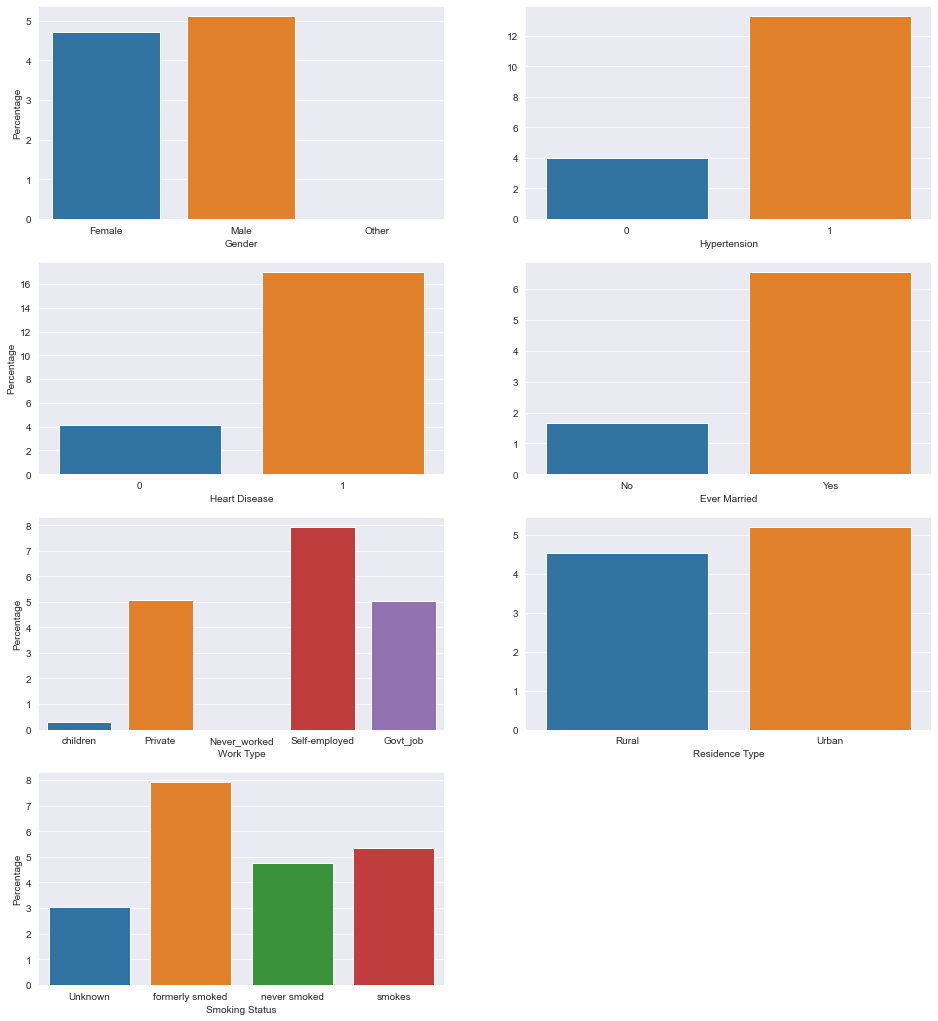

In [26]:
# percent of stroke in each category of people

def plot_percent_of_stroke_in_each_category(df, column, axis) :
    x_axis = []
    y_axis = []

    unique_values = df[column].unique()
    
    for value in unique_values:
        stroke_yes = len(df[(df[column] == value) & (df['stroke'] == 1)])
        total = len(df[df[column] == value])
        percentage = (stroke_yes/total) * 100
        x_axis.append(value)
        y_axis.append(percentage)
        
    sns.barplot(x_axis, y_axis, ax=axis)
    
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes[3,1].remove()

plot_percent_of_stroke_in_each_category(stroke, 'gender', axes[0,0])
axes[0,0].set_xlabel("Gender")
axes[0,0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke, 'hypertension', axes[0,1])
axes[0,1].set_xlabel("Hypertension")

plot_percent_of_stroke_in_each_category(stroke, 'heart_disease', axes[1,0])
axes[1,0].set_xlabel("Heart Disease")
axes[1,0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke, 'ever_married', axes[1,1])
axes[1,1].set_xlabel("Ever Married")



plot_percent_of_stroke_in_each_category(stroke, 'work_type', axes[2,0])
axes[2,0].set_xlabel("Work Type")
axes[2,0].set_ylabel("Percentage")

plot_percent_of_stroke_in_each_category(stroke, 'Residence_type', axes[2,1])
axes[2,1].set_xlabel("Residence Type")

plot_percent_of_stroke_in_each_category(stroke, 'smoking_status', axes[3,0])
axes[3,0].set_xlabel("Smoking Status")
axes[3,0].set_ylabel("Percentage")

plt.show()